In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
path = 'https://raw.githubusercontent.com/umangkejriwal1122/Machine-Learning/master/Data%20Sets/covid_india.csv'

In [3]:
df = pd.read_csv(path)
df.head()

,Unnamed: 0,State,Total Confirmed Cases,Total Cured Cases,Total Death Cases,Lat,Long
0,0,Andaman and Nicobar Islands,33,15,0,11.7401,92.6586
1,1,Andhra Pradesh,1332,287,31,15.9129,79.7400
2,2,Arunachal Pradesh,1,1,0,28.2180,94.7278
3,3,Assam,38,29,1,26.2006,92.9376
4,4,Bihar,392,65,2,25.0961,85.3131


In [0]:
df.drop(["Unnamed: 0"],axis = 1 , inplace = True)

In [5]:
df.head()

,State,Total Confirmed Cases,Total Cured Cases,Total Death Cases,Lat,Long
0,Andaman and Nicobar Islands,33,15,0,11.7401,92.6586
1,Andhra Pradesh,1332,287,31,15.9129,79.7400
2,Arunachal Pradesh,1,1,0,28.2180,94.7278
3,Assam,38,29,1,26.2006,92.9376
4,Bihar,392,65,2,25.0961,85.3131


In [6]:
df = df.rename(columns = { "Total Confirmed Cases" : "Confirmed" , "Total Cured Cases" : "Cured" , 
                          "Total Death Cases" : "Deaths" })
df.head()

,State,Confirmed,Cured,Deaths,Lat,Long
0,Andaman and Nicobar Islands,33,15,0,11.7401,92.6586
1,Andhra Pradesh,1332,287,31,15.9129,79.7400
2,Arunachal Pradesh,1,1,0,28.2180,94.7278
3,Assam,38,29,1,26.2006,92.9376
4,Bihar,392,65,2,25.0961,85.3131


In [7]:
df['Active'] = df['Confirmed'] - df['Cured'] - df['Deaths']
df.head()

,State,Confirmed,Cured,Deaths,Lat,Long,Active
0,Andaman and Nicobar Islands,33,15,0,11.7401,92.6586,18
1,Andhra Pradesh,1332,287,31,15.9129,79.7400,1014
2,Arunachal Pradesh,1,1,0,28.2180,94.7278,0
3,Assam,38,29,1,26.2006,92.9376,8
4,Bihar,392,65,2,25.0961,85.3131,325


In [8]:
df['Confirmed'].sum()

33050

In [9]:
total_active_cases = df.groupby('State')['Active'].sum().sort_values(ascending=False).to_frame()
total_active_cases

,Active
State,
Maharashtra,7890
Gujarat,3358
Delhi,2291
Madhya Pradesh,1971
Rajasthan,1619
Uttar Pradesh,1585
Andhra Pradesh,1014
Tamil Nadu,925
Telengana,619


In [10]:
### Confirmed vs Cured
df

,State,Confirmed,Cured,Deaths,Lat,Long,Active
0,Andaman and Nicobar Islands,33,15,0,11.7401,92.6586,18
1,Andhra Pradesh,1332,287,31,15.9129,79.7400,1014
2,Arunachal Pradesh,1,1,0,28.2180,94.7278,0
3,Assam,38,29,1,26.2006,92.9376,8
4,Bihar,392,65,2,25.0961,85.3131,325
5,Chandigarh,56,17,0,30.7333,76.7794,39
6,Chhattisgarh,38,34,0,21.2787,81.8661,4
7,Delhi,3439,1092,56,28.7041,77.1025,2291
8,Goa,7,7,0,15.2993,74.1240,0
9,Gujarat,4082,527,197,22.2587,71.1924,3358


In [11]:
total_active_cases.style.background_gradient(cmap='Reds')

,Active
State,
Maharashtra,7890
Gujarat,3358
Delhi,2291
Madhya Pradesh,1971
Rajasthan,1619
Uttar Pradesh,1585
Andhra Pradesh,1014
Tamil Nadu,925
Telengana,619


In [12]:
data = df[['State','Confirmed','Cured']]
data.head()

,State,Confirmed,Cured
0,Andaman and Nicobar Islands,33,15
1,Andhra Pradesh,1332,287
2,Arunachal Pradesh,1,1
3,Assam,38,29
4,Bihar,392,65


In [13]:
data.sort_values("Confirmed",ascending=False,inplace=True)
data

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,State,Confirmed,Cured
18,Maharashtra,9915,1593
9,Gujarat,4082,527
7,Delhi,3439,1092
17,Madhya Pradesh,2561,461
25,Rajasthan,2438,768
26,Tamil Nadu,2162,1210
30,Uttar Pradesh,2134,510
1,Andhra Pradesh,1332,287
27,Telengana,1012,367
31,West Bengal,758,124


In [14]:
type(data)

pandas.core.frame.DataFrame

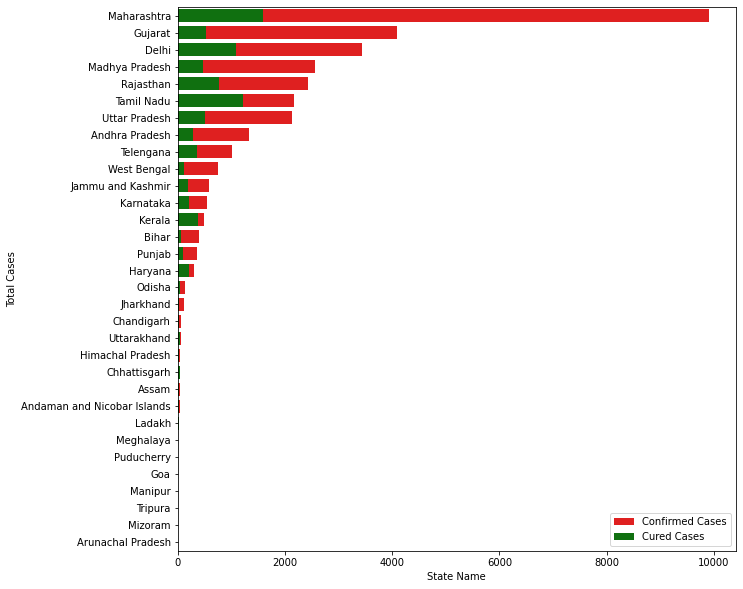

In [15]:
# Plotting
plt.figure(figsize=(10,10))
sns.barplot(data['Confirmed'],data['State'],label="Confirmed Cases",color="red")
sns.barplot(data['Cured'],data['State'],label="Cured Cases",color="green")
plt.legend(loc=4)
plt.xlabel("State Name")
plt.ylabel("Total Cases")
plt.show()

# Plot on India Map

In [16]:
# import the necessary libraries
import folium
import numpy as np

# declaration of map
india_map = folium.Map(location=[9,80],zoom_start=4,max_zoom=5,height=1000,width='100%')

# Makig the circles
for i in range(0,len(df[df['Active']>0].index)):
  folium.Circle(
      location=[df.iloc[i]['Lat'],df.iloc[i]['Long']],
      radius=(int(np.log2(df.iloc[i]['Active']+1.0001)))*15000,
      tooltip="<h5 style='text-align:center;font-weight: bold'>"+df.iloc[i].State+"</h5>"+
      "<li> Active:   "+str(df.iloc[i]['Active'])+"</li>"+
      "</ul>",
      fill=True).add_to(india_map)

india_map